# Activation Functions

Activation function determine whether a neuron should be activated or not. This indicates it will decide whether the input neuron to the network is important or not.

The functions below represents the sum of multiplication of input neuron and weight as input of the activation function ($h(x)$) computed in two steps. 

$$ a = b + w_1x_1 + w_2x_2 $$
$$ y = h(a) $$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import networkx as nx

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Sigmoid Function

In [2]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [3]:
x = np.array([-1, 1, 2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

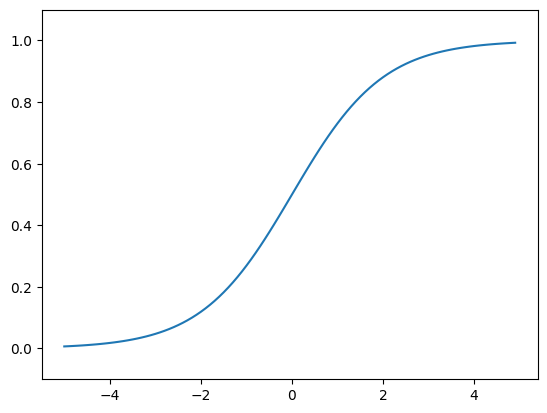

In [4]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # set y-axis range
plt.show()

## Tanh Function

In [5]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

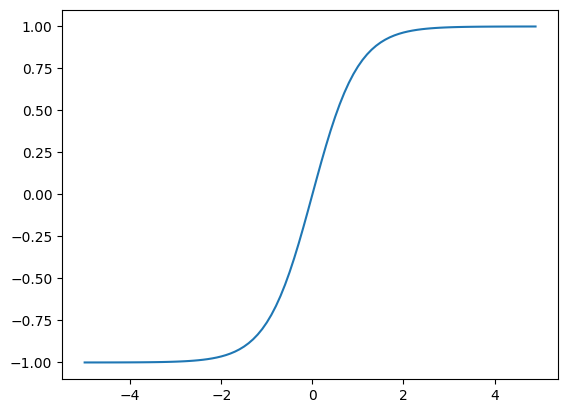

In [6]:
x = np.arange(-5, 5, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1) # set y-axis range
plt.show()

## Step Function

In [7]:
def step_function(x):
    y = x > 0 
    return y.astype(int)

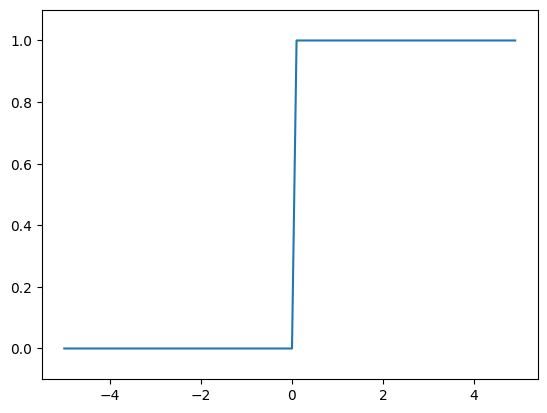

In [8]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # set y-axis range
plt.show()

## Comparison

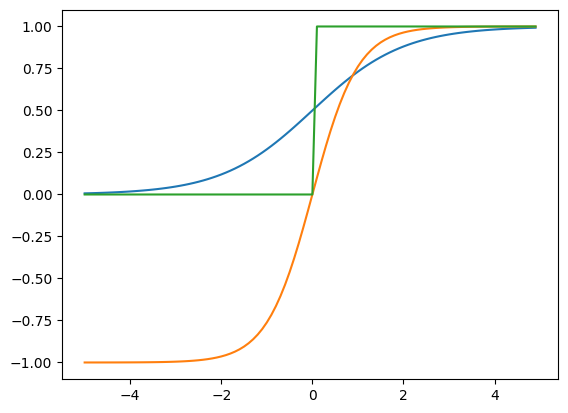

In [9]:
y1 = sigmoid(x)
y2 = tanh(x)
y3 = step_function(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

## Relu Function

In [10]:
def relu(x): 
    return np.maximum(0,x)

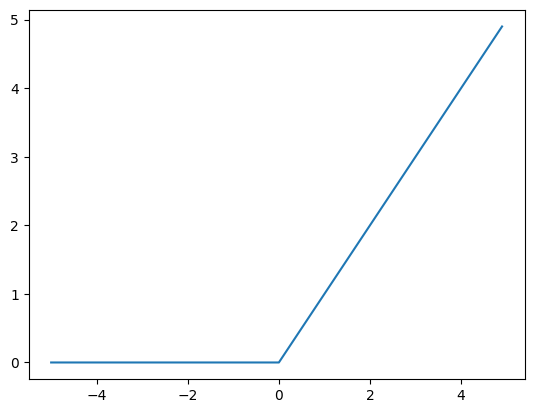

In [11]:
y4 = relu(x)
plt.plot(x, y4)
plt.show()

## Neural Network Visualisation

The figure below is what we are going to implement

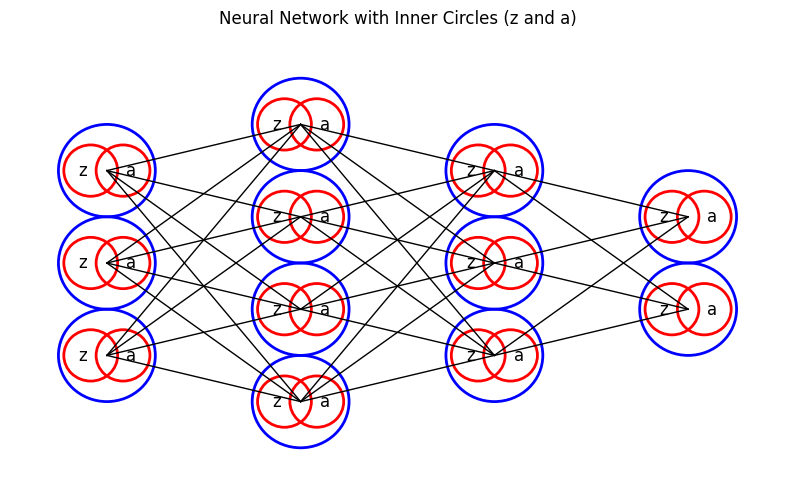

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_neural_network():
    fig, ax = plt.subplots(figsize=(10, 6))

    # 노드 위치 정의
    positions = {
        # 입력층 (3개)
        "x1": (-4, 2.5), "x2": (-4, 1.5), "x3": (-4, 0.5),
        # 은닉층 1 (4개)
        "z1^(2)": (-2, 3), "z2^(2)": (-2, 2), "z3^(2)": (-2, 1), "z4^(2)": (-2, 0),
        # 은닉층 2 (3개)
        "z1^(3)": (0, 2.5), "z2^(3)": (0, 1.5), "z3^(3)": (0, 0.5),
        # 출력층 (2개)
        "y1": (2, 2), "y2": (2, 1)
    }

    # 뉴런을 원 3개로 표현하는 함수
    def draw_neuron(ax, x, y, radius=0.5):
        """ 뉴런을 바깥 원 + 내부 원(2개)로 그리는 함수 """
        # 바깥 원
        outer_circle = plt.Circle((x, y), radius, color='blue', fill=False, lw=2)
        ax.add_patch(outer_circle)

        # 내부 원 (왼쪽: z 값)
        left_inner_circle = plt.Circle((x - radius/3, y), radius/1.8, color='red', fill=False, lw=2)
        ax.add_patch(left_inner_circle)
        
        # 내부 원 (오른쪽: a 값)
        right_inner_circle = plt.Circle((x + radius/3, y), radius/1.8, color='red', fill=False, lw=2)
        ax.add_patch(right_inner_circle)

    # 노드 그리기
    for node, (x, y) in positions.items():
        draw_neuron(ax, x, y)

        # 텍스트 추가
        plt.text(x - 0.25, y, "z", fontsize=12, ha='center', va='center', color='black')
        plt.text(x + 0.25, y, "a", fontsize=12, ha='center', va='center', color='black')

    # 엣지 정의 및 그리기
    edges = [
        # 입력층 → 은닉층 1
        ("x1", "z1^(2)"), ("x1", "z2^(2)"), ("x1", "z3^(2)"), ("x1", "z4^(2)"),
        ("x2", "z1^(2)"), ("x2", "z2^(2)"), ("x2", "z3^(2)"), ("x2", "z4^(2)"),
        ("x3", "z1^(2)"), ("x3", "z2^(2)"), ("x3", "z3^(2)"), ("x3", "z4^(2)"),
        # 은닉층 1 → 은닉층 2
        ("z1^(2)", "z1^(3)"), ("z1^(2)", "z2^(3)"), ("z1^(2)", "z3^(3)"),
        ("z2^(2)", "z1^(3)"), ("z2^(2)", "z2^(3)"), ("z2^(2)", "z3^(3)"),
        ("z3^(2)", "z1^(3)"), ("z3^(2)", "z2^(3)"), ("z3^(2)", "z3^(3)"),
        ("z4^(2)", "z1^(3)"), ("z4^(2)", "z2^(3)"), ("z4^(2)", "z3^(3)"),
        # 은닉층 2 → 출력층
        ("z1^(3)", "y1"), ("z1^(3)", "y2"),
        ("z2^(3)", "y1"), ("z2^(3)", "y2"),
        ("z3^(3)", "y1"), ("z3^(3)", "y2")
    ]
    
    for src, dst in edges:
        x1, y1 = positions[src]
        x2, y2 = positions[dst]
        plt.plot([x1, x2], [y1, y2], 'k-', lw=1)

    # 그래프 출력
    plt.xlim(-5, 3)
    plt.ylim(-1, 4)
    plt.axis('off')
    plt.title("Neural Network with Inner Circles (z and a)")
    plt.show()

# 실행
draw_neural_network()


## Simple Three-Layered NN implementation

In [13]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

W1.shape # (2,3)
X.shape # (2,)
B1.shape # (3,)

A1 = np.dot(X, W1) + B1

# after applying the activation function
Z1 = sigmoid(A1)

print(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

Z1.shape # (3,)
W2.shape # (3,2)
B2.shape # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### Identity Function

In [14]:
def softmax(a): 
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [15]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y)) # The sum of softmax function returns 1

[0.01821127 0.24519181 0.73659691]
1.0


In [16]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = softmax(A3)

## Summary

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.40625907 0.59374093]
